In [1]:
import os
from glob import glob
import numpy as np
import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
os.getcwd()

'C:\\Users\\신상훈\\Documents\\GitHub\\Deep-learning\\practical exercise'

In [4]:
os.listdir('C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [12]:
data_paths = glob('C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training/*/*.png')

In [14]:
len(data_paths)

60000

In [15]:
path = data_paths[0]

In [16]:
path

'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\1.png'

# 데이터 분석 (MNIST)

In [17]:
os.listdir('C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [18]:
len(os.listdir('C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training'))

10

In [19]:
label_nums = os.listdir('C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training')
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [21]:
len(label_nums)

10

Label 0의 데이터 갯수 확인

### 데이터 별 갯수 비교

In [25]:
lbl_n = label_nums[0]
'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training/'+lbl_n

'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training/0'

In [27]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training/'+lbl_n)
    nums_dataset.append(len(data_per_class))

In [28]:
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [29]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

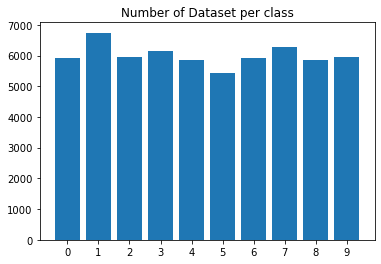

In [30]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per class')
plt.show()

# Pillow로 열기

In [31]:
path

'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\1.png'

In [32]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [34]:
image.shape

(28, 28)

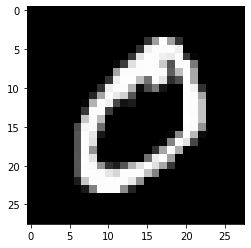

In [35]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 열기

In [37]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [38]:
image.shape

TensorShape([28, 28, 1])

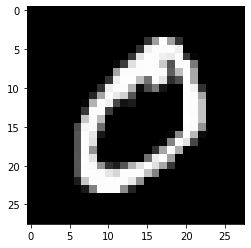

In [39]:
plt.imshow(image[:,:,0],'gray')
plt.show()

# Label 얻기

In [40]:
path

'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\1.png'

In [42]:
path.split('\\')

['C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training', '0', '1.png']

In [44]:
label = path.split('\\')[-2]

In [45]:
label

'0'

In [46]:
int(label)

0

In [47]:
def get_label(path):
    class_name = path.split('\\')[-2]
    label = int(class_name)
    return label

In [48]:
path , get_label(path)

('C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\1.png', 0)

# 데이터 이미지 사이즈 알기

In [49]:
from tqdm import tqdm_notebook

In [53]:
data_path[:10]

['C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\1.png',
 'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\1000.png',
 'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\10005.png',
 'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\10010.png',
 'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\10022.png',
 'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\10025.png',
 'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\10026.png',
 'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\10045.png',
 'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\10069.png',
 'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\10071.png']

In [54]:
len(data_path)

60000

In [51]:
heights = []
widths = []

for path in tqdm_notebook(data_paths):
    image_pil = Image.open(path)
    image = np.array(image_pil)
    h,w = image.shape
    
    heights.append(h)
    widths.append(w)

<ipython-input-51-0fb38bcd5115>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm_notebook(data_paths):


In [55]:
np.unique(heights)

array([28])

In [56]:
np.unique(widths)

array([28])

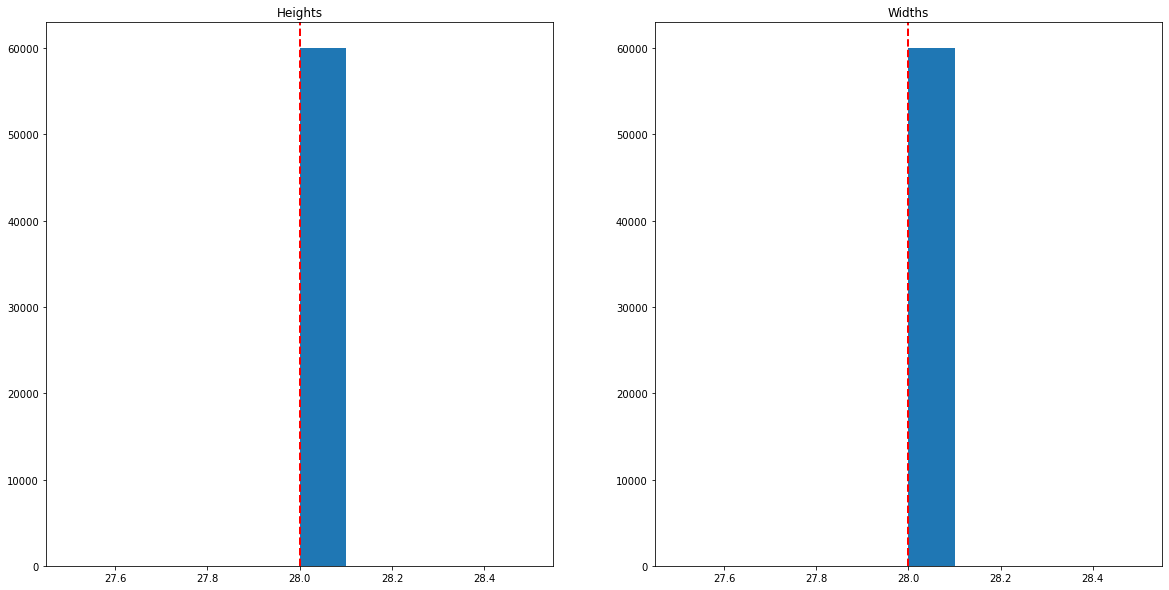

In [52]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

plt.show()